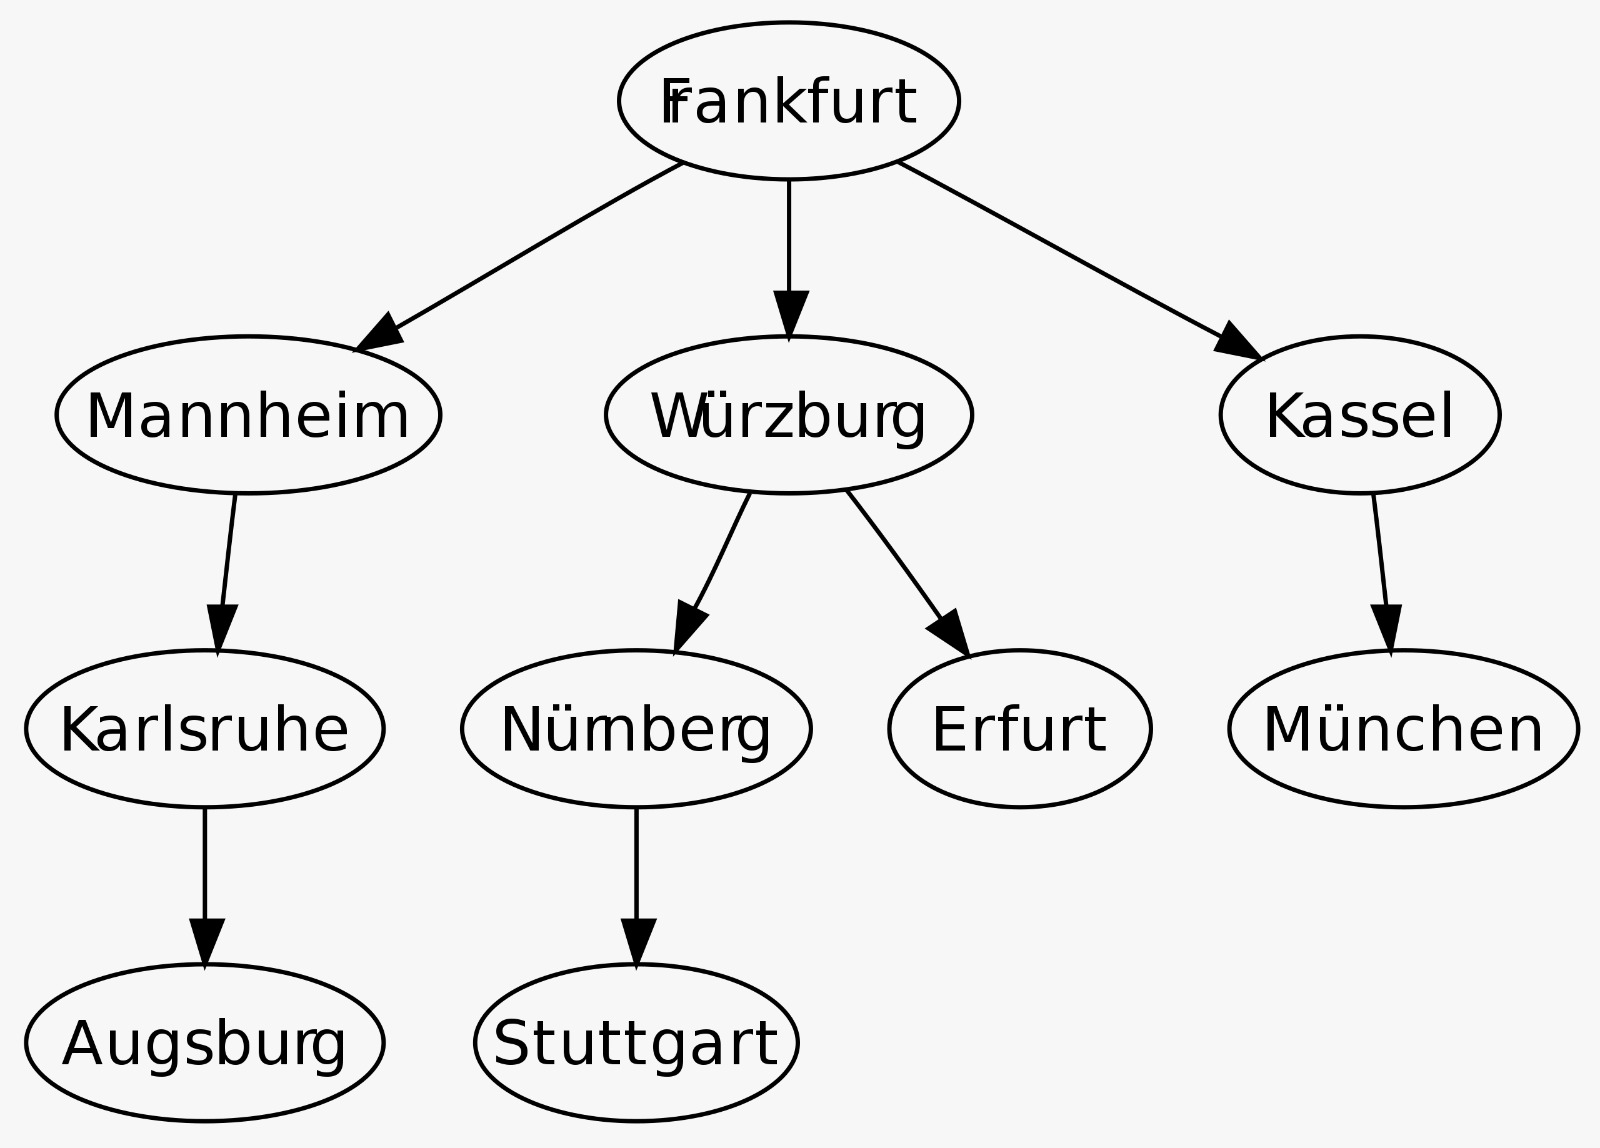

This graph will be used to run and test these algos.

In [17]:
graph = { "Frankfurt": ["Mannheim", "Wurzburg", "Kassel"], 
"Mannheim": ["Karlsrude", "Frankfurt"], 
"Karlsrude": ["Ausburg", "Mannheim"],  
"Ausburg": ["Karlsrude"], 
"Wurzburg": ["Numburg", "Erfurt", "Frankfurt"], 
"Numburg": ['Stuttgart', 'Wurzburg'], 
"Erfurt" : ['Wurzburg'], 
"Stuttgart": ['Numburg'], 
"Kassel": ['Munchen','Frankfurt'], 
'Munchen': ["Kassel"]}


DFS (Depth-First Search): DFS is a graph traversal algorithm that explores as far as possible along each branch before backtracking. It uses a stack (or recursion) to keep track of nodes, making it suitable for applications like finding connected components and detecting cycles in graphs.

In [4]:
visited_list = []

def depth_first_search(node):
    """
    Perform a depth-first search (DFS) starting from the given node.

    Args:
        node (str): The starting node for DFS.
    
    """
    global visited_list
    
    if node not in visited_list:
        print(node)
        visited_list.append(node)
        
        # Recursively visit each adjacent node
        for adjacent in graph[node]:
            depth_first_search(adjacent)


In [5]:
depth_first_search("Frankfurt")

Frankfurt
Mannheim
Karlsrude
Ausburg
Wurzburg
Numburg
Stuttgart
Erfurt
Kassel
Munchen


In [7]:
def dfs_stop_to_target(graph, node1, node2):
    """
    Perform a depth-first search (DFS) from node1 to node2 and return the path if found.

    Args:
        graph (dict): A dictionary representing the graph where keys are node names and values are lists of adjacent nodes.
        node1 (str): The starting node for DFS.
        node2 (str): The target node for DFS.

    Returns:
        list: A list of nodes representing the path from node1 to node2, if found.
    """
    visited_list = []

    def dfs(node):
        if node not in visited_list:
            visited_list.append(node)
            if node == node2:
                return visited_list
            for new_node in graph[node]:
                result = dfs(new_node)
                if result:
                    return result
        return None

    if node1 not in graph:
        raise ValueError(f"Node {node1} not found in the graph.")

    return dfs(node1)


node1 = 'Frankfurt'                                                 
node2 = 'Munchen' 

k = dfs_stop_to_target(graph, node1, node2)
print(k)


['Frankfurt', 'Mannheim', 'Karlsrude', 'Ausburg', 'Wurzburg', 'Numburg', 'Stuttgart', 'Erfurt', 'Kassel', 'Munchen']


In [16]:
def dfs_find_path(graph, node1, target_node):
    """
    Perform a depth-first search (DFS) to find a path from node1 to target_node in the graph.

    Args:
        graph (dict): A dictionary representing the graph where keys are node names and values are lists of adjacent nodes.
        node1 (str): The starting node for DFS.
        target_node (str): The target node to find the path to.

    Returns:
        list: A list of nodes representing the path from node1 to target_node. Returns None if no path is found.
    """
    def dfs(node, path, visited):
        path.append(node)
        if node == target_node:
            return path  # Return the path if the target node is found
        if node not in visited:
            visited.append(node)
            for new_node in graph.get(node, []):
                new_path = dfs(new_node, path.copy(), visited.copy())
                if new_path:
                    return new_path
        return None

    visited = []
    if node1 not in graph:
        raise ValueError(f"Node {node1} not found in the graph.")
    
    result = dfs(node1, [], visited)
    return result


node1 = 'Frankfurt'
target_node = 'Kassel'
path = dfs_find_path(graph, node1, target_node)

if path:
    print(f"Path from {node1} to {target_node}: {' -> '.join(path)}")
else:
    print(f"No path found from {node1} to {target_node}.")


Path from Frankfurt to Kassel: Frankfurt -> Kassel


BFS (Breadth-First Search): BFS is another graph traversal algorithm that explores all neighbor nodes at the present depth level before moving on to nodes at the next depth level. It uses a queue to maintain the order of exploration, making it ideal for finding the shortest path in unweighted graphs and exploring the graph layer by layer.

In [20]:
def bfs(graph, start_node):
    """
    Perform a breadth-first search (BFS) starting from the given start_node without using imports.

    Args:
        graph (dict): A dictionary representing the graph where keys are node names and values are lists of adjacent nodes.
        start_node (str): The starting node for BFS.
    
    Returns:
        list: A list of nodes representing the order in which they were visited during BFS.
    """
    visited = []
    queue = [start_node]
    visited.append(start_node)
    result = []

    while queue:
        node = queue.pop(0)
        result.append(node)  # Collect the visited nodes

        for neighbor in graph.get(node, []):
            if neighbor not in visited:
                visited.append(neighbor)
                queue.append(neighbor)

    return result

# Example usage:
start_node = "Frankfurt"
bfs_result = bfs(graph, start_node)
print("BFS result:", bfs_result)


BFS result: ['Frankfurt', 'Mannheim', 'Wurzburg', 'Kassel', 'Karlsrude', 'Numburg', 'Erfurt', 'Munchen', 'Ausburg', 'Stuttgart']


In [13]:
def bfs_stop_to_target(graph, start_node, target_node):
    """
    Perform a breadth-first search (BFS) from the start_node to the target_node.

    Args:
        graph (dict): A dictionary representing the graph where keys are node names and values are lists of adjacent nodes.
        start_node (str): The starting node for BFS.
        target_node (str): The target node to stop the BFS.

    Returns:
        list: A list of nodes representing the order in which they were visited until the target node is reached.
    """
    visited_list = []
    queue_list = [start_node]
    
    while queue_list:
        node = queue_list.pop(0)

        if node == target_node:
            visited_list.append(node)
            break

        if node not in visited_list:
            visited_list.append(node)
            queue_list.extend(graph[node])

    return visited_list


start_node = "Numburg"
target_node = "Kassel"
result = bfs_stop_to_target(graph, start_node, target_node)
print("BFS result:", result)


BFS result: ['Numburg', 'Stuttgart', 'Wurzburg', 'Erfurt', 'Frankfurt', 'Mannheim', 'Kassel']


In [14]:
def bfs_find_shortest_path(graph, start_node, target_node):
    """
    Perform a breadth-first search (BFS) to find the shortest path from the start_node to the target_node.

    Args:
        graph (dict): A dictionary representing the graph where keys are node names and values are lists of adjacent nodes.
        start_node (str): The starting node for BFS.
        target_node (str): The target node to find the shortest path to.

    Returns:
        list: A list of nodes representing the shortest path from start_node to target_node. 
              Returns an empty list if no path is found.
    """
    visited = []
    queue = [(start_node, [start_node])]

    while queue:
        node, path = queue.pop(0)

        if node == target_node:
            return path  # Return the path if the target node is found

        if node not in visited:
            visited.append(node)

        for neighbor in graph.get(node, []):
            if neighbor not in [x for x, _ in queue] and neighbor not in visited:
                new_path = path + [neighbor]
                queue.append((neighbor, new_path))

    return []  # If the target node is not found, return an empty list

start_node = "Frankfurt"
target_node = "Numburg"

shortest_path = bfs_find_shortest_path(graph, start_node, target_node)

if shortest_path:
    print(f"Shortest path from {start_node} to {target_node}: {shortest_path}")
else:
    print(f"No path found from {start_node} to {target_node}.")


Shortest path from Frankfurt to Numburg: ['Frankfurt', 'Wurzburg', 'Numburg']
